## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

In [5]:
contrib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668864 entries, 0 to 668863
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   cmte_id            668864 non-null  object        
 1   cand_id            668864 non-null  object        
 2   cand_nm            668864 non-null  object        
 3   contbr_nm          668864 non-null  object        
 4   contbr_city        668863 non-null  object        
 5   contbr_st          668864 non-null  object        
 6   contbr_zip         668860 non-null  object        
 7   contbr_employer    619110 non-null  object        
 8   contbr_occupation  664126 non-null  object        
 9   contb_receipt_amt  668864 non-null  float64       
 10  contb_receipt_dt   668864 non-null  datetime64[ns]
 11  receipt_desc       8558 non-null    object        
 12  memo_cd            27302 non-null   object        
 13  memo_text          388991 non-null  object  

In [23]:
contrib.contb_receipt_amt.value_counts()

50.00     95516
100.00    78388
25.00     77657
10.00     61162
27.00     54078
          ...  
-20.15        1
430.27        1
37.05         1
92.86         1
45.67         1
Name: contb_receipt_amt, Length: 6531, dtype: int64

In [29]:
contrib.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

In [20]:
contrib['contb_receipt_amt'].describe()

count   668,864.00
mean        123.01
std         439.35
min      -5,700.00
25%          15.00
50%          27.00
75%          75.00
max      10,800.00
Name: contb_receipt_amt, dtype: float64

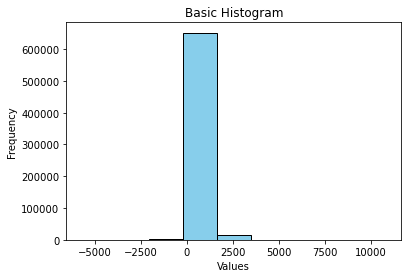

In [18]:
# 1a YOUR CODE HERE
# Plotting a basic histogram

plt.hist(contrib['contb_receipt_amt'],bins=9,color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

- **1a answer here:** In the 2016 CA elections primary contributions dataset, the range of contributions that have the highest count frequency are -10 to 2000.

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

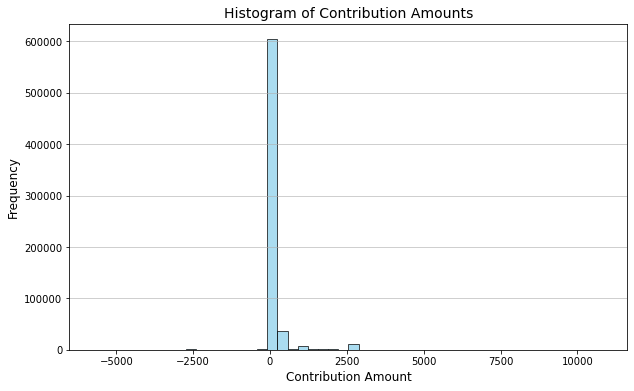

In [36]:
# 1b YOUR CODE HERE
# Extract contribution amounts and drop NaN values for plotting
contribution_amounts = pd.to_numeric(contrib['contb_receipt_amt'], errors='coerce').dropna()

# Plot the histogram for contribution amounts
plt.figure(figsize=(10, 6))
plt.hist(contribution_amounts, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Contribution Amounts', fontsize=14)
plt.xlabel('Contribution Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()



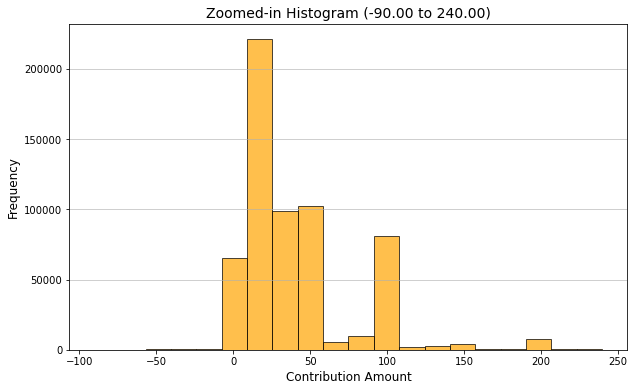

(-90.0, 240.0)

In [27]:
# Recalculate the histogram data without plotting
hist_data, bin_edges = np.histogram(contribution_amounts, bins=50)

# Identify the range with the highest frequency
max_freq_index = hist_data.argmax()
max_range_start = bin_edges[max_freq_index]
max_range_end = bin_edges[max_freq_index + 1]

# Filter data for the zoomed-in range
zoomed_data = contribution_amounts[
    (contribution_amounts >= max_range_start) & (contribution_amounts < max_range_end)
]

# Plot the zoomed-in histogram
plt.figure(figsize=(10, 6))
plt.hist(zoomed_data, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title(f'Zoomed-in Histogram ({max_range_start:.2f} to {max_range_end:.2f})', fontsize=14)
plt.xlabel('Contribution Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Return the range with the highest frequency
max_range_start, max_range_end

- **1b answer here:** 
We can see that maxmum number of contributions are between -90 and 240. Additional some of the contributions in the amount of -90 has been returned. We will need to investigate this further.  

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

TypeError: unhashable type: 'numpy.ndarray'

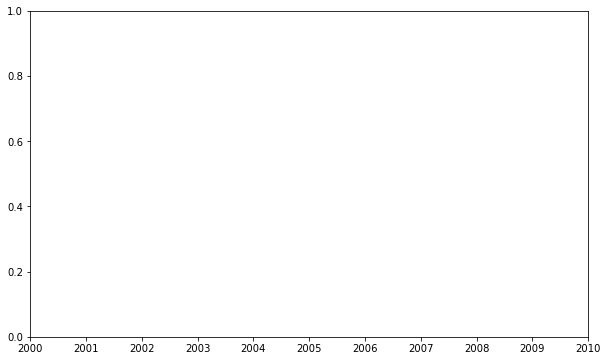

In [38]:
# 1c YOUR CODE HERE
dates = ["15-Jan-2016", "16-Jan-2016", "17-Jan-2016", "18-Jan-2016", "10-Feb-2016", "11-Feb-2016", "12-Feb-2016", "08-Mar-2016", "09-Mar-2016", "10-Mar-2016"]

# df.groupby(df['date'].dt.strftime('%B'))['Revenue'].sum().sort_values()

df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')sa
    
'''contributions_bernie = contrib[contrib["cand_nm"] == "Sanders, Bernard"]
contributions_bernie.groupby(contributions_bernie['contb_receipt_dt'].dt.strftime('%B'))['contb_receipt_amt'].sum().sort_values()
contributions_clinton = contrib[contrib["cand_nm"] == "Clinton, Hillary Rodham"]
contributions_clinton.groupby(contributions_clinton['contb_receipt_dt'].dt.strftime('%B'))['contb_receipt_amt'].sum().sort_values()
# Parse dates
dates = [datetime.strptime(date, "%d-%b-%Y") for date in dates]

debate_dates = [datetime.strptime(date, "%d %b %Y") for date in ["17 Jan 2016", "11 Feb 2016", "9 Mar 2016"]]

plt.figure(figsize=(10, 6))

plt.plot(dates, contributions_bernie, label="Candidate X")
plt.plot(dates, contributions_clinton, label="Candidate Y")
for date in debate_dates:
    plt.axvline(x=date, color='r', linestyle='--', label="Primary Debate")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Total Contribution Amount")
plt.title("Daily Contribution Trends ")
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
'''

In [35]:

contributions_bernie = contrib[contrib["cand_nm"] == "Sanders, Bernard"].contb_receipt_amt
contributions_clinton = contrib[contrib["cand_nm"] == "Clinton, Hillary Rodham"].contb_receipt_amt
contributions_clinton 
contributions_bernie 

3         40.00
4         35.00
5        100.00
6         25.00
8         10.00
          ...  
666333    50.00
666334   100.00
666335    15.00
666336    15.00
666337    15.00
Name: contb_receipt_amt, Length: 379284, dtype: float64

- **1c answer here:** 

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [50]:
# 2a YOUR CODE HERE
table1=contrib.groupby(['cand_nm']).agg({'contb_receipt_amt':len})
table1.sort_values('contb_receipt_amt', ascending=False)


,contb_receipt_amt
cand_nm,
"Sanders, Bernard",379284
"Clinton, Hillary Rodham",171104
"Cruz, Rafael Edward 'Ted'",56355
"Carson, Benjamin S.",27015
"Rubio, Marco",13267
"Fiorina, Carly",4679
"Paul, Rand",4164
"Trump, Donald J.",3806
"Bush, Jeb",3056


- **2a answer here:** Sanders, Bernard received the largest number/count of contributions.

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [51]:
# 2b YOUR CODE HERE
table2=contrib.groupby(['cand_nm']).agg({'contb_receipt_amt':sum})
table2.sort_values('contb_receipt_amt', ascending=False)


,contb_receipt_amt
cand_nm,
"Clinton, Hillary Rodham","38,969,122.68"
"Sanders, Bernard","19,062,998.80"
"Cruz, Rafael Edward 'Ted'","5,926,568.27"
"Rubio, Marco","4,998,700.92"
"Bush, Jeb","3,316,836.83"
"Carson, Benjamin S.","3,022,105.15"
"Fiorina, Carly","1,473,989.42"
"Kasich, John R.","1,471,417.54"
"Trump, Donald J.","868,672.16"


- **2b answer here:**  Clinton, Hillary Rodham raised the most money in California. 

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [67]:
# 2c YOUR CODE HERE

#table3=contrib.groupby(['cand_nm']).agg(Donations_Count=('contb_receipt_amt',len),Donations_Amount=('contb_receipt_amt',sum))
#table3
table_chk = pd.merge(table1, table2, how="left", on="cand_nm")
table_chk.head()

,contb_receipt_amt_x,contb_receipt_amt_y
cand_nm,,
"Bush, Jeb",3056,"3,316,836.83"
"Carson, Benjamin S.",27015,"3,022,105.15"
"Christie, Christopher J.",333,"456,066.00"
"Clinton, Hillary Rodham",171104,"38,969,122.68"
"Cruz, Rafael Edward 'Ted'",56355,"5,926,568.27"


**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [64]:
# 2d YOUR CODE HERE
table4=contrib.groupby(['cand_nm']).agg(Donations_Count=('contb_receipt_amt',len),Donations_Amount=('contb_receipt_amt',sum),AverageDonation=('contb_receipt_amt',np.mean))
table4.sort_values('AverageDonation', ascending=False)


,Donations_Count,Donations_Amount,AverageDonation
cand_nm,,,
"Gilmore, James S III",3,"8,100.00","2,700.00"
"Perry, James R. (Rick)",104,"208,400.00","2,003.85"
"Pataki, George E.",20,"30,450.00","1,522.50"
"Christie, Christopher J.",333,"456,066.00","1,369.57"
"Graham, Lindsey O.",305,"379,495.00","1,244.25"
"Bush, Jeb",3056,"3,316,836.83","1,085.35"
"O'Malley, Martin Joseph",392,"297,334.26",758.51
"Jindal, Bobby",31,"23,231.26",749.40
"Walker, Scott",666,"492,706.90",739.80


- **2d answer here:** Gilmore, James S III candidate had the highest average donation.

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

In [85]:
#We further need to manipulate the data

#converting donation column to a series 
cand=contrib['cand_nm'].values.tolist()

#converting AverageDonation column to a series 
avg_don=table4['AverageDonation'].values.tolist()

#converting total donation amount column to a series 
tot_don=table4['Donations_Amount'].values.tolist()

In [100]:
candidates_l=contrib.cand_nm.unique()

In [103]:
np.arange(len(candidates_l))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

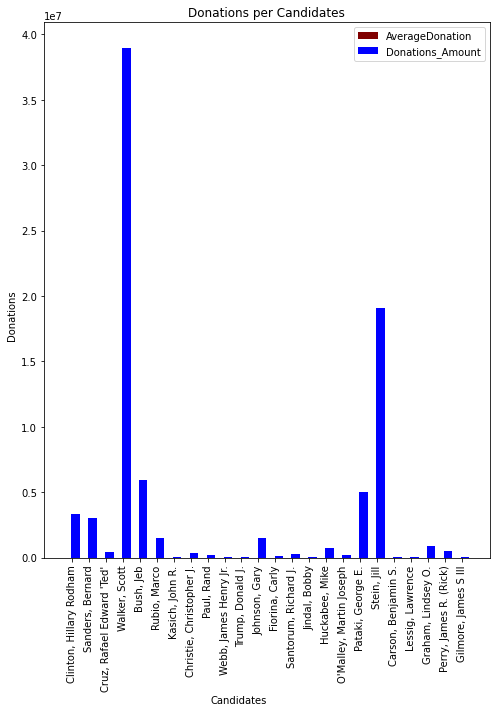

In [190]:
# 2e YOUR CODE HERE
import numpy as np  
import matplotlib.pyplot as plt  

candidates_l=contrib.cand_nm.unique()

X_axis = np.arange(len(candidates_l)) 


plt.bar(X_axis-0.2, avg_don,color ='maroon',width = 0.5, label = 'AverageDonation')  
plt.bar(X_axis + 0.2, tot_don,color='blue',width= 0.5, label = 'Donations_Amount') 
plt.rcParams["figure.figsize"] = [7.00, 10.00]
plt.rcParams["figure.autolayout"] = True
plt.xticks(X_axis,candidates_l,rotation=90) 
ax2.set_yscale('log')
plt.xlabel("Candidates",ha='right') 
plt.ylabel("Donations",ha='right') 
plt.title("Donations per Candidates") 
plt.legend() 
plt.show() 


**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** Sanders, Bernard has the highest count of donations at 379284 followed by Hillary Clinton at 171104. Hillary Clinton has tthe highest total amount of donation at 38,969,122.68 followed by Sanders, Bernard at 19,062,998.80

## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [143]:
# 3a YOUR CODE HERE
#contrib.info()
filtered_df=contrib[contrib["cand_nm"]=='Clinton, Hillary Rodham']

filtered_df2=filtered_df.contbr_occupation.value_counts()
top5_clinton=filtered_df2.squeeze(axis=0)[:5]
top5_clinton

RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64

The top 5 occupations of individuals that contributed to Hillary Clinton are 
1. Retired
2. Attorney
3. Information Requested 
4. Teacher
5. Homemaker

**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [179]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE

    df=df.contbr_occupation.value_counts()
    top5=df.squeeze(axis=0)[:5]
    return top5

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [180]:
# 3c YOUR CODE HERE
#Hillary Clinton
clinton_df=contrib[contrib["cand_nm"]=='Clinton, Hillary Rodham']
get_donors(clinton_df)

RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64

In [181]:
#Bernie Sanders
brnie_df=contrib[contrib["cand_nm"]=='Sanders, Bernard']
get_donors(brnie_df)

NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: contbr_occupation, dtype: int64

In [164]:
#Donald Trump
trump_df=contrib[contrib["cand_nm"]=='Trump, Donald J.']
get_donors(trump_df)

RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: contbr_occupation, dtype: int64

**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [186]:
# 3d YOUR CODE HERE
contrib.groupby('cand_nm').apply(get_donors)



cand_nm                                                          
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)


- **3e answer here:** It is interesting to note that the Retired community has the most number of donations amongs all candidates. Bernie Sanders has the most number of donations at folowed by Hillary Cinton. It is interesting to note that 'Not Employed' donor category was the highest for Bernie Sanders, who had overall highest number of donors.   

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** It is interesting to note that maximum number of donors are RETIRED and NOT EMPLOYED.    

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k